In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset of iris flowers from seaborn library
df = sns.load_dataset('iris')

In [3]:
df.tail(60)

,sepal_length,sepal_width,petal_length,petal_width,species
90,5.5,2.6,4.4,1.2,versicolor
91,6.1,3.0,4.6,1.4,versicolor
92,5.8,2.6,4.0,1.2,versicolor
93,5.0,2.3,3.3,1.0,versicolor
94,5.6,2.7,4.2,1.3,versicolor
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor
99,5.7,2.8,4.1,1.3,versicolor


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
# as i see one duplicate row, i will drop it
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

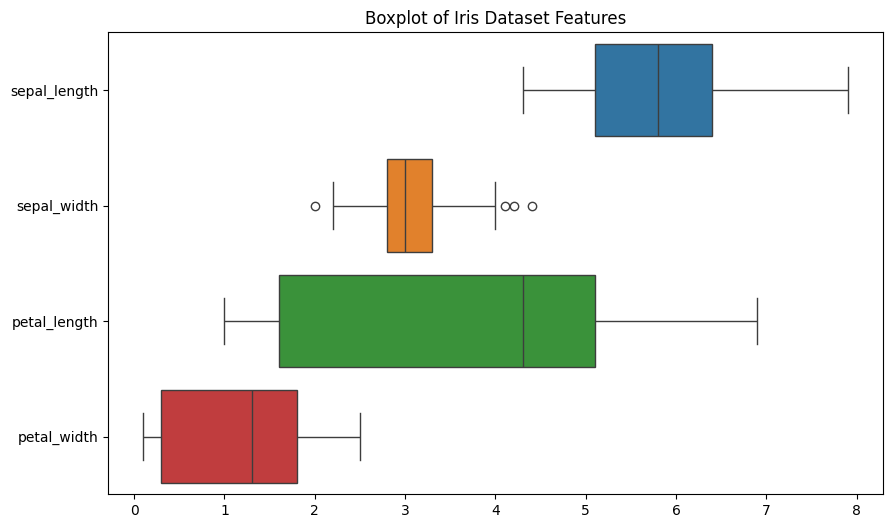

In [10]:
# lets visualize the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Iris Dataset Features')
plt.show()


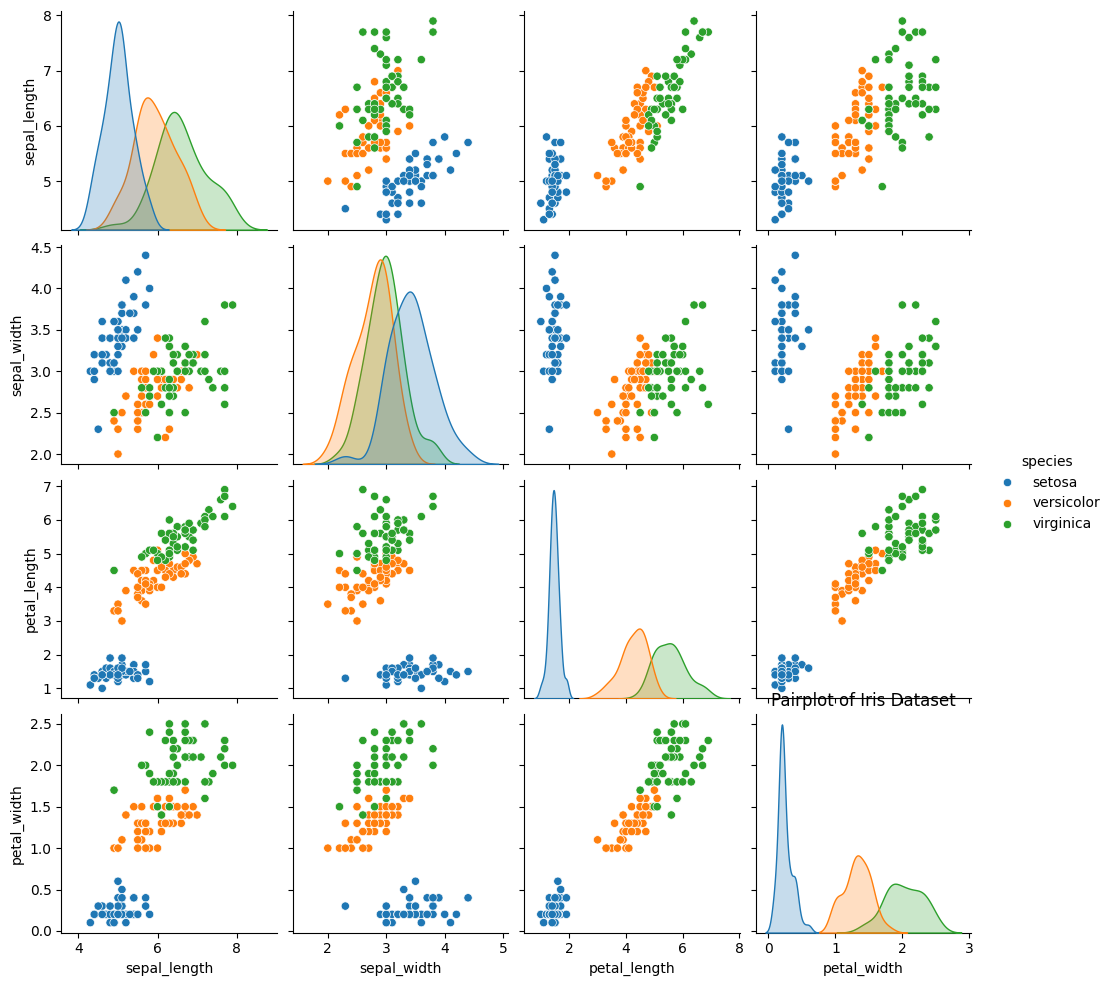

In [11]:
# lets visualize the data
sns.pairplot(df, hue='species')
plt.title('Pairplot of Iris Dataset')
plt.show()


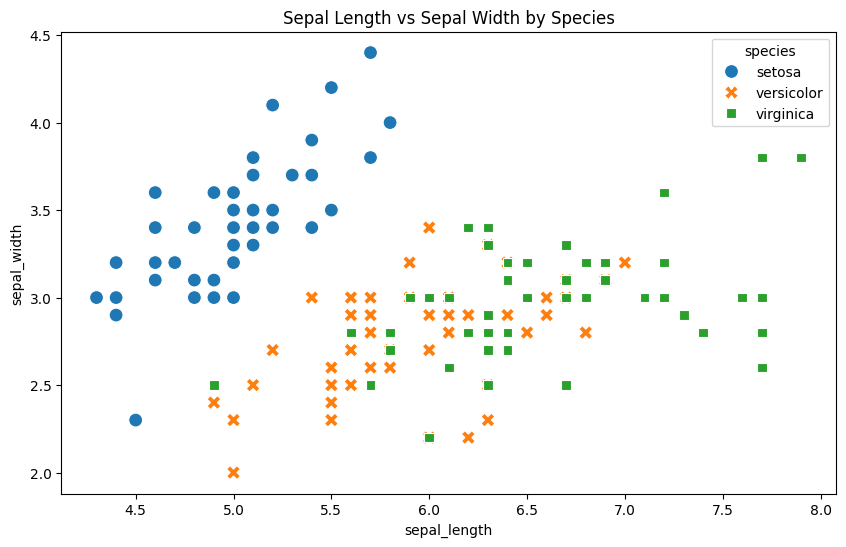

In [12]:
# lets visualize the data of each species using scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='species', s=100)
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()




In [13]:
# Now lets prepare the data for modeling
X = df.drop('species', axis=1)
y = df['species']

In [14]:
# lets separate the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# Make a KNN model
knn = KNeighborsClassifier(n_neighbors=3)


In [17]:
# After making the model, lets fit the model to the training data
knn.fit(X_train, y_train)


,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
# Now lets make predictions on the test data
y_pred = knn.predict(X_test)


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Accuracy Score: 0.9333333333333333


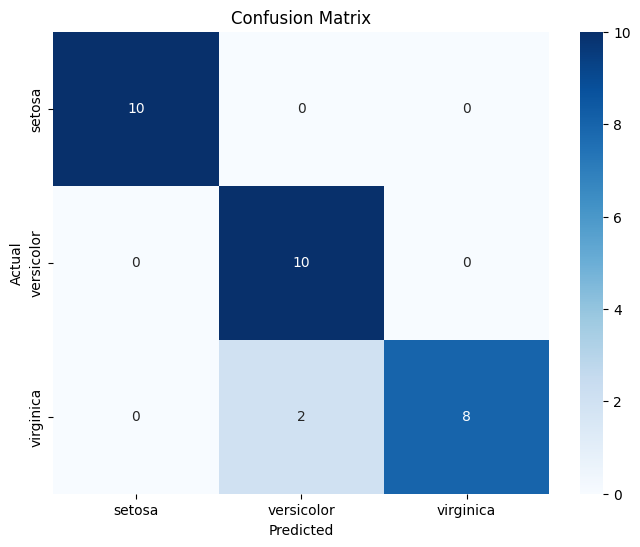

In [19]:
# Now lets the performance of the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

d:\ML(ExtraClass Project)\ML_DEEP_Project\MachineLearrning Projects\KNN-Iris-Classification\.knnirisclassification\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


New Data Point Prediction: setosa


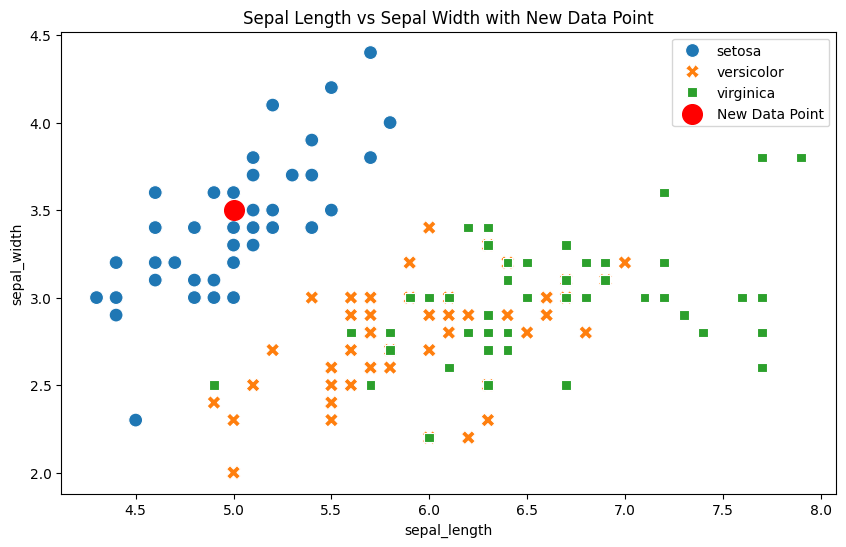

In [20]:
# lets  test the model with a new data point
new_data = np.array([[5.0, 3.5, 1.5, 0.2]])
new_data_scaled = scaler.transform(new_data)
new_prediction = knn.predict(new_data_scaled)
print("New Data Point Prediction:", new_prediction[0])
# Visualize the decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='species', s=100)
plt.scatter(new_data[0][0], new_data[0][1], color='red', s=200, label='New Data Point')
plt.title('Sepal Length vs Sepal Width with New Data Point')
plt.legend()
plt.show()


In [21]:
# Now save the model using joblib
import joblib
joblib.dump(knn, 'knn_iris_model.pkl')

# Load the model to verify it works
loaded_model = joblib.load('knn_iris_model.pkl')


In [22]:
# lets save the scaler as well
joblib.dump(scaler, 'scaler_iris.pkl')
# Load the scaler to verify it works
loaded_scaler = joblib.load('scaler_iris.pkl')
